In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import csv
import json
import collections as cl
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
pred_train_origin = np.loadtxt('../result/result_0903.csv', delimiter=',')
pred_val_origin = np.loadtxt('../result/result_0904.csv', delimiter=',')
pred_test_origin = np.loadtxt('../result/result_0915.csv', delimiter=',')
grand_03 = pd.read_csv('../data/0903formated_label.csv', delimiter=',')
grand_04 = pd.read_csv('../data/0904formated_label.csv', delimiter=',')
grand_15 = pd.read_csv('../data/0915formated_label.csv', delimiter=',')

In [3]:
def format_time(date):
    return int(str(date)[:-6]), str(int(str(date)[-6:-4]))+ ':' +str(int(str(date)[-4:-2])) + ':' + str(int(str(date)[-2:]))


def format_data(pred_origin):
    pred_dict = {}
    pred_list = []
    count = 0
    for index ,row in enumerate(tqdm(pred_origin)):
        pred_dict.setdefault(row[0], [])
        pred_dict[row[0]].append(row[1])
        
    
    for key in tqdm(pred_dict):
        most_count = Counter(pred_dict[key])
        
#         print(most_count)
        result = most_count.most_common(1)
        pred_list.append([key, int(result[0][0])])
        
    return pred_list

def format_grand(pred_origin):
    label_dict = {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 11:9, 12:10, 13:11}
    grand_list = []
    pred_list = []
    count = 0
    label = 0
    for index ,row in enumerate(tqdm(pred_origin)):
        day ,target_time = format_time(int(row[0]))
        try:
            if day == 3:
                grand = grand_03[grand_03.time == target_time]
            elif day == 4:
                grand = grand_04[grand_04.time == target_time]
            else:
                grand = grand_15[grand_15.time == target_time]
            label = int(grand.values[0][1])
        except:
            count += 1
        
        grand_list.append(label_dict[label])
        pred_list.append(int(row[1]))
        
    return grand_list, pred_list

In [4]:
pred_train_origin[0]

array([3.075345e+06, 1.100000e+01])

In [5]:
pred_train_list = format_data( pred_train_origin)
pred_val_list = format_data(pred_val_origin)
pred_test_list = format_data(pred_test_origin)

100%|██████████| 26736/26736 [00:00<00:00, 59083.76it/s]


In [6]:
grand_train, pred_train = format_grand( pred_train_list)
grand_val, pred_val = format_grand( pred_val_list)
grand_test, pred_test = format_grand( pred_test_list)

100%|██████████| 26736/26736 [02:03<00:00, 215.68it/s]


In [7]:
np.savetxt('../result/format_grad_train.csv',grand_train,delimiter=',')
np.savetxt('../result/format_pred_train.csv',pred_train,delimiter=',')
np.savetxt('../result/format_grad_val.csv',grand_val,delimiter=',')
np.savetxt('../result/format_pred_val.csv',pred_val,delimiter=',')
np.savetxt('../result/format_grad_test.csv',grand_test,delimiter=',')
np.savetxt('../result/format_pred_test.csv',pred_test,delimiter=',')

In [8]:
grand_train = np.loadtxt('../result/format_grad_train.csv',delimiter=',')
pred_train = np.loadtxt('../result/format_pred_train.csv',delimiter=',')
grand_val = np.loadtxt('../result/format_grad_val.csv',delimiter=',')
pred_val = np.loadtxt('../result/format_pred_val.csv',delimiter=',')
grand_test = np.loadtxt('../result/format_grad_test.csv',delimiter=',')
pred_test = np.loadtxt('../result/format_pred_test.csv',delimiter=',')

In [17]:
train_mat = confusion_matrix(grand_train, pred_train)
val_mat = confusion_matrix(grand_val, pred_val)
test_mat = confusion_matrix(grand_test, pred_test)

In [54]:
test_mat

array([[ 7725,   542,  1297,   358,    30,   266,   641,  1343,   436,
          461,  1034,   395],
       [ 1922,  9884,  2023,   261,    77,   231,   163,   405,    29,
           66,   369,    98],
       [ 2043,   207, 24118,   287,    23,    23,  3305,   265,  1063,
          392,   191,    59],
       [ 1222,    97,   173, 17514,     7,    25,    74,    11,   454,
            6,   646,   659],
       [ 1268,   107,   818,    54,  5199,   567,  1858,   372,     0,
            0,  1285,     0],
       [  402,   102,   424,    68,   499,  6334,   940,  2704,    32,
            0,   388,    89],
       [  172,     2,    87,   111,    98,   133,  5154,  1657,     5,
            0,    73,    12],
       [ 3441,  2206,   298,    47,   154,  3456,  1881,  9228,    88,
            0,   834,   125],
       [  203,     0,    19,    33,     0,    14,  2250,   120,  3051,
            0,   862,    24],
       [  580,    83,   411,    30,     0,     0,     0,     0,     0,
          646,     0

In [19]:
grand_train[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
print(accuracy_score(grand_train, pred_train))
print(accuracy_score(grand_val, pred_val))
print(accuracy_score(grand_test, pred_test))

0.909238397733245
0.7140157739073283
0.711811789347696


In [10]:
print(precision_score(grand_train, pred_train, average='macro'))
print(precision_score(grand_val, pred_val, average='macro'))
print(precision_score(grand_test, pred_test, average='macro'))
print(precision_score(grand_train, pred_train, average=None))
print(precision_score(grand_val, pred_val, average=None))
print(precision_score(grand_test, pred_test, average=None))

0.892518951191939
0.6084069855839578
0.6395805129211258
[0.81061023 0.9541907  0.9741133  0.94298451 0.96860465 0.80479252
 0.87697023 0.89889159 0.80952381 0.88461538 0.82150364 0.96342685]
[0.36138924 0.65695793 0.36       0.92123894 0.52631579 0.86075949
 0.53139357 0.66013825 0.         0.60465116 0.84584585 0.97219361]
[0.35203891 0.75291232 0.79243827 0.88209256 0.85786164 0.58679525
 0.31848659 0.5573694  0.43309859 0.44148936 0.73177843 0.96860484]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
print(recall_score(grand_train, pred_train, average='macro'))
print(recall_score(grand_val, pred_val, average='macro'))
print(recall_score(grand_test, pred_test, average='macro'))
print(recall_score(grand_train, pred_train, average=None))
print(recall_score(grand_val, pred_val, average=None))
print(recall_score(grand_test, pred_test, average=None))

0.8688664539810215
0.5664495664339663
0.6211726366460467
[0.83023649 0.77401596 0.96938776 0.92200046 0.91588785 0.83555825
 0.9452572  0.87569134 0.81652257 0.63888889 0.93075655 0.97219414]
[0.83393502 0.52051282 0.57446809 0.88974359 0.15503876 0.83435583
 0.88974359 0.29460154 0.         0.25742574 0.74416557 0.80340426]
[0.54582367 0.65249734 0.77862017 0.86333202 0.47960619 0.53087248
 0.72047671 0.44341373 0.46590909 0.36563877 0.6749904  0.93289108]


In [12]:
print(f1_score(grand_train, pred_train, average='macro'))
print(f1_score(grand_val, pred_val, average='macro'))
print(f1_score(grand_test, pred_test, average='macro'))
print(f1_score(grand_train, pred_train, average=None))
print(f1_score(grand_val, pred_val, average=None))
print(f1_score(grand_test, pred_test, average=None))

0.8777470523869951
0.5521020239038038
0.6162558777087978
[0.82030598 0.85471125 0.97174478 0.93237443 0.9415089  0.81988687
 0.9098342  0.88713981 0.81300813 0.74193548 0.87272415 0.96779064]
[0.50425671 0.58082976 0.44262295 0.90521739 0.23952096 0.84735202
 0.6653883  0.40739424 0.         0.36111111 0.79175451 0.87977633]
[0.4280191  0.69911756 0.78546845 0.87261146 0.61524583 0.55743481
 0.44171372 0.4939037  0.44890511 0.4        0.70223821 0.95041257]


In [27]:
def draw_heatmap(x, y):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.figure()
    plt.imshow(heatmap, extent=extent)
    plt.show()
    plt.savefig('image.png')

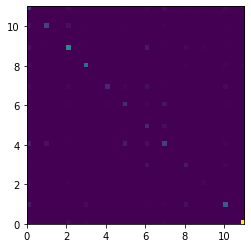

<Figure size 432x288 with 0 Axes>

In [30]:
draw_heatmap(grand_test,pred_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.


<Figure size 432x288 with 0 Axes>

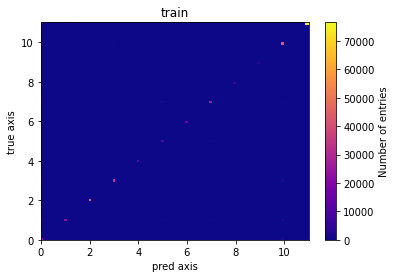

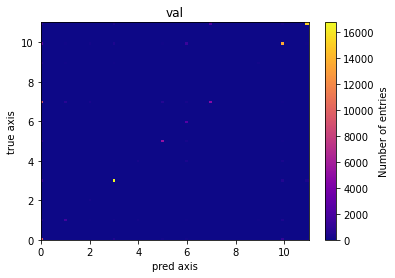

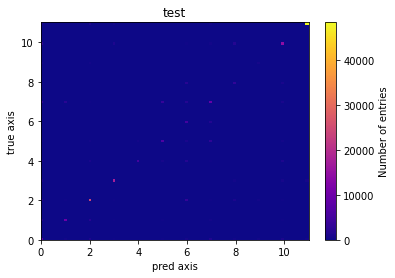

<Figure size 432x288 with 0 Axes>

In [13]:
plt.hist2d(pred_train, grand_train, bins=100, normed=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('train')
plt.xlabel('pred axis')
plt.ylabel('true axis')
plt.savefig("train.png")
plt.figure()


plt.hist2d(pred_val, grand_val, bins=100, normed=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('val')
plt.xlabel('pred axis')
plt.ylabel('true axis')
plt.savefig("val.png")
plt.figure()

plt.hist2d(pred_test, grand_test, bins=100, normed=False, cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of entries')

# Add title and labels to plot.
plt.title('test')
plt.xlabel('pred axis')
plt.ylabel('true axis')
plt.savefig("test.png")
plt.figure()

## 結果
### class全体 average = macro
|         |   accuracy   |   precision  |    recall    |      f1      |
| ------- | ------------ | ------------ | ------------ | ------------ |
|  train  | 0.6516919954 | 0.6436380034 | 0.5910831599 | 0.6067506293 |
|   val   | 0.6674038461 | 0.5517315375 | 0.5169484974 | 0.4764812080 |
|  test   | 0.6954128440 | 0.6239421412 | 0.6040498228 | 0.5998828050 |

### class毎 average = macro
#### train
|           |   class01    |   class02    |   class03    |   class04    |   class05    |   class06    |   class07    |   class08    |   class09    |   class10    |   class11    |   class12    |
| --------- | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ |
| precision |   0.3917291  |  0.66431861  |  0.76413431  |  0.63590984  |  0.66540548  |  0.56405319  |  0.69578269  |  0.65899141  |  0.78933892  |  0.57556561  |  0.9316774   |  0.82525913  |
|  recall   |  0.61717853  |  0.52151191  |  0.62596273  |  0.6522021   |  0.61484169  |  0.46498016  |  0.60568026  |  0.56645072  |  0.45898755  |  0.42437722  |  0.70679694  |  0.83402811  |
|    f1     |  0.47926447  |  0.58431633  |  0.58431633  |  0.64395294  |  0.64395294  |  0.50974741  |  0.6476125   |  0.60922691  |  0.5804519   |  0.4885418   |  0.58096618  |  0.82962045  |
 
#### val

|           |   class01    |   class02    |   class03    |   class04    |   class05    |   class06    |   class07    |   class08    |   class09    |   class10    |   class11    |
| --------- | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ |
| precision |  0.29240822  |  0.18072289  |  0.          |  0.90378503  |  0.34579439  |  0.71973588  |  0.43628982  |  0.6728972   |  0.67521368  |  0.86695402  |  0.97524579  |
|  recall   |  0.61717853  |  0.52151191  |  0.          |  0.86480509  |  0.14015152  |  0.76521061  |  0.94391892  |  0.04551201  |  0.42934783  |  0.48411425  |  0.90516539  |
|    f1     |  0.43427185  |  0.21479714  |  0.          |  0.8838655   |  0.19946092  |  0.74177694  |  0.59675352  |  0.08525755  |  0.52491694  |  0.62129325  |  0.93889969  |
  

#### test

|           |   class01    |   class02    |   class03    |   class04    |   class05    |   class06    |   class07    |   class08    |   class09    |   class10    |   class11    |   class12    |
| --------- | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ | ------------ |
| precision |  0.32852769  |  0.73695198  |  0.78152949  |  0.86233383  |  0.84044617  |  0.56715616  |  0.31155171  |  0.53914466  |  0.4344916   |  0.40577889  |  0.71441989  |  0.96497363  |
|  recall   |  0.53173183  |  0.63652756  |  0.75425319  |  0.83847185  |  0.4509889   |  0.52862627  |  0.68683369  |  0.42411986  |  0.46395985  |  0.34361702  |  0.65978817  |  0.92967968  |
|    f1     |  0.40613007  |  0.68306842  |  0.76764912  |  0.85023545  |  0.58699334  |  0.50974741  |  0.54721382  |  0.42866054  |  0.47476462  |  0.44874246  |  0.68601809  |  0.94699792  |
 


In [54]:
df_pred[df_pred[0] == 8]

,0
1277,8.0
1278,8.0
1412,8.0
1413,8.0
1414,8.0
1418,8.0
1423,8.0
1424,8.0
1425,8.0
1426,8.0


In [53]:
df_grand[df_grand[0] == 8]

,0
5556,8.0
5557,8.0
5558,8.0
5559,8.0
5560,8.0
...,...
46613,8.0
46614,8.0
46615,8.0
46616,8.0


In [77]:
df_grand.head()

,0
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0


In [20]:
df_pred = pd.DataFrame(pred_test)
df_grand = pd.DataFrame(grand_test)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81931d5278>]],
      dtype=object)

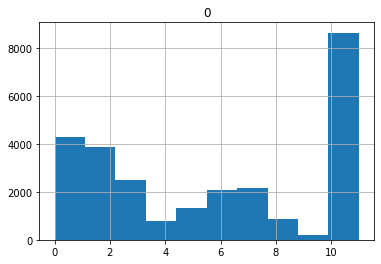

In [21]:
df_pred.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8193446cc0>]],
      dtype=object)

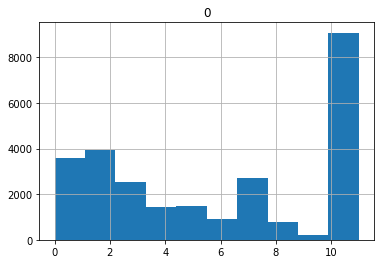

In [22]:
df_grand.hist()

#### 